In [1]:
using BeamLib: IsotropicArray, steerphi, music
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P_M = music.(Ref(pa), Ref(X), Ref(d), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
  467.4341952937408 + 0.0im
 464.80604692451664 + 0.0im
  457.0537359366527 + 0.0im
  444.5591234836417 + 0.0im
   427.912917051307 + 0.0im
 407.85490103186225 + 0.0im
  385.2054085233048 + 0.0im
 360.79832357079584 + 0.0im
 335.42389595811005 + 0.0im
  309.7864020037296 + 0.0im
                    ⋮
  550.6024783337475 + 0.0im
 503.29106725012144 + 0.0im
    467.05501135572 + 0.0im
  439.3674643078527 + 0.0im
 418.50652551148994 + 0.0im
    403.29253685952 + 0.0im
  392.9281641305241 + 0.0im
 386.90037013631365 + 0.0im
  384.9219353450777 + 0.0im

In [5]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P_M)).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

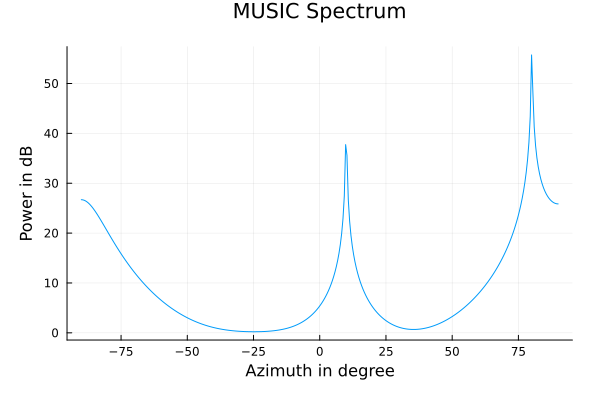

In [6]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P_M)))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")